In [1]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.combine import SMOTETomek, SMOTEENN
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from collections import Counter

In [2]:
df = pd.read_csv("penguins.csv", names = ['island', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex', 'species'])

# Q1

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   island             344 non-null    object 
 1   bill_length_mm     342 non-null    float64
 2   bill_depth_mm      342 non-null    float64
 3   flipper_length_mm  342 non-null    float64
 4   body_mass_g        342 non-null    float64
 5   sex                333 non-null    object 
 6   species            344 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


## Q2

In [4]:
df.dropna(axis = 0, how = 'any').info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   island             333 non-null    object 
 1   bill_length_mm     333 non-null    float64
 2   bill_depth_mm      333 non-null    float64
 3   flipper_length_mm  333 non-null    float64
 4   body_mass_g        333 non-null    float64
 5   sex                333 non-null    object 
 6   species            333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


## Q3

In [5]:
for col in ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']:
    df[[col]] = SimpleImputer(missing_values = np.nan, strategy = 'mean').fit_transform(df[[col]])

In [6]:
for col in ['sex', 'island', 'species']:
    df[[col]] = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent').fit_transform(df[[col]])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   island             344 non-null    object 
 1   bill_length_mm     344 non-null    float64
 2   bill_depth_mm      344 non-null    float64
 3   flipper_length_mm  344 non-null    float64
 4   body_mass_g        344 non-null    float64
 5   sex                344 non-null    object 
 6   species            344 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


## Q4

In [8]:
island_mapping = {
    'Biscoe': 0,
    'Dream': 1,
    'Torgersen': 2
}
sex_mapping = {
    'female': 0,
    'male': 1
}
species_mapping = {
    'Adelie': 0,
    'Chinstrap': 1,
    'Gentoo': 2
}

for col, mapping in [('sex', sex_mapping), ('island', island_mapping), ('species', species_mapping)]:
    encoder = LabelEncoder()
    encoder.fit(list(island_mapping.values()))
    df[col] = encoder.transform([mapping[val] for val in df[col]])

In [9]:
df

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,species
0,2,39.10000,18.70000,181.000000,3750.000000,1,0
1,2,39.50000,17.40000,186.000000,3800.000000,0,0
2,2,40.30000,18.00000,195.000000,3250.000000,0,0
3,2,43.92193,17.15117,200.915205,4201.754386,1,0
4,2,36.70000,19.30000,193.000000,3450.000000,0,0
...,...,...,...,...,...,...,...
339,1,55.80000,19.80000,207.000000,4000.000000,1,1
340,1,43.50000,18.10000,202.000000,3400.000000,0,1
341,1,49.60000,18.20000,193.000000,3775.000000,1,1
342,1,50.80000,19.00000,210.000000,4100.000000,1,1


## Q5, Q6, Q7
Answered in the report.

# Q8
### SMOTETomek

In [10]:
temp_df = df[['island', 'species']].copy()
temp_df.groupby(by = "island", as_index = False).agg({"species": "count"})

,island,species
0,0,168
1,1,124
2,2,52


In [11]:
x, y = SMOTETomek(random_state = 0).fit_resample(temp_df.drop(columns = ["species"]), temp_df["species"])
Counter(y)

Counter({0: 152, 2: 152, 1: 152})

### SMOTEENN

In [12]:
temp_df = df[['island', 'species']].copy()
temp_df.groupby(by = "island", as_index = False).agg({"species": "count"})

,island,species
0,0,168
1,1,124
2,2,52


In [13]:
x, y = SMOTEENN(random_state = 0).fit_resample(temp_df.drop(columns = ["species"]), temp_df["species"])
Counter(y)

Counter({0: 152})

## Q9

In [14]:
df.describe()

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,species
count,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000
mean,0.662791,43.921930,17.151170,200.915205,4201.754386,0.520349,0.918605
std,0.726194,5.443643,1.969027,14.020657,799.613058,0.500313,0.893320
min,0.000000,32.100000,13.100000,172.000000,2700.000000,0.000000,0.000000
25%,0.000000,39.275000,15.600000,190.000000,3550.000000,0.000000,0.000000
50%,1.000000,44.250000,17.300000,197.000000,4050.000000,1.000000,1.000000
75%,1.000000,48.500000,18.700000,213.000000,4750.000000,1.000000,2.000000
max,2.000000,59.600000,21.500000,231.000000,6300.000000,1.000000,2.000000


In [15]:
norm_df = pd.DataFrame(
    data = StandardScaler().fit_transform(df.drop(columns = ["species"])),
    columns = [col for col in df.columns if col != "species"]
)

norm_df.describe()

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
count,3.440000e+02,3.440000e+02,3.440000e+02,3.440000e+02,3.440000e+02,3.440000e+02
mean,8.262125e-17,-1.156697e-15,4.131062e-16,-8.262125e-16,8.262125e-17,-6.454785e-18
std,1.001457e+00,1.001457e+00,1.001457e+00,1.001457e+00,1.001457e+00,1.001457e+00
min,-9.140204e-01,-2.174858e+00,-2.060444e+00,-2.065333e+00,-1.880837e+00,-1.041561e+00
25%,-9.140204e-01,-8.548868e-01,-7.889322e-01,-7.796428e-01,-8.162745e-01,-1.041561e+00
50%,4.650279e-01,6.035444e-02,7.569585e-02,-2.796522e-01,-1.900612e-01,9.600978e-01
75%,4.650279e-01,8.422188e-01,7.877425e-01,8.631834e-01,6.866374e-01,9.600978e-01
max,1.844076e+00,2.884265e+00,2.211836e+00,2.148873e+00,2.627899e+00,9.600978e-01


## Q10

In [16]:
pca_df = pd.DataFrame(
    data = PCA(n_components = 3).fit_transform(norm_df),
    columns = ["pca_1", "pca_2", "pca_3"]
)

pca_df

,pca_1,pca_2,pca_3
0,-2.267511,1.266175,-0.048591
1,-2.078927,-0.528109,0.842508
2,-2.143540,-0.409198,1.103311
3,-0.604432,1.186353,0.705630
4,-2.594861,-0.183224,0.554844
...,...,...,...
339,0.448975,2.107021,1.421763
340,-1.012636,-0.547222,0.739321
341,-0.379978,1.294431,0.598062
342,0.398441,1.669301,0.819717


## Q11

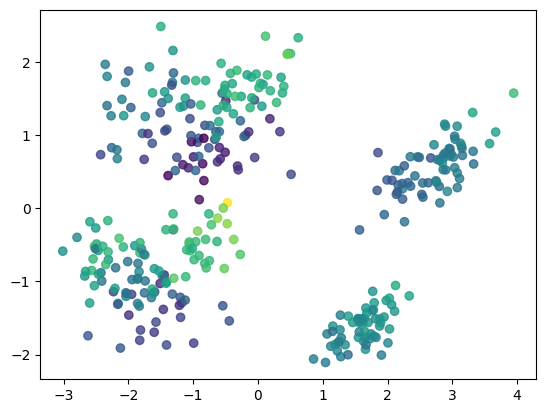

In [17]:
plt.scatter(
    x = pca_df["pca_1"],
    y = pca_df["pca_2"],
    c = pca_df["pca_3"],
    cmap = "viridis",
    alpha = 0.8,
)
plt.show()

## Q12

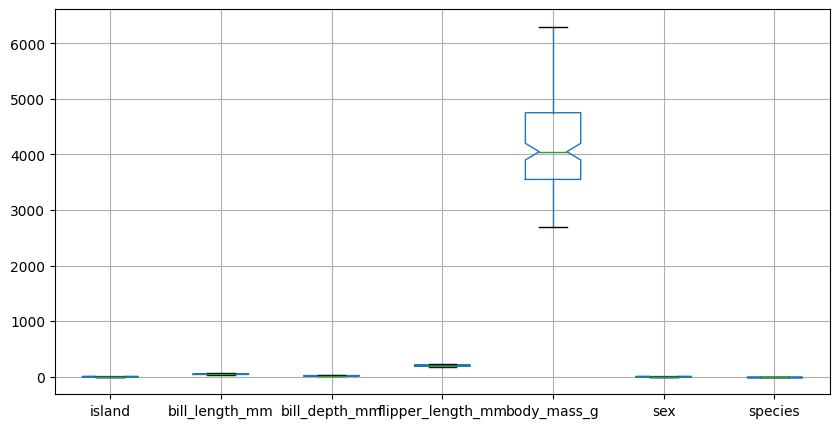

In [18]:
fig, ax = plt.subplots(figsize = (10, 5))
df.boxplot(ax = ax, notch = True, bootstrap = 5000)
plt.show()